# Query

##  1. Introduction 

TUGAS ASSIGN 2

FINZA YANUAR

PYTN090ONL002 Finza

## 2. Import Libraries 

These are libraries that are used in this assignment:

- pandas : Used to load data and analyze data

- numpy : Used to do mathematical calculation necessary in the data analysis

- scipy.stats : Used to do statistical calculation

- matplotlib : Used to visualize data

- seaborn : Used to do sophisticated data visualization

- warnings : Used to ignore any warning

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## 3. Data Loading 

We have been provided with 1 dataset. A description for what the dataset contains is given below:


- **h8dsft_P0GC2_Abdurrahman_Shiddiq_Thaha.csv** : This dataset is about waste disposal and management in Austin, TX. 

In [ ]:
df = pd.read_csv('h8dsft_P0GC2_Abdurrahman_Shiddiq_Thaha.csv')

### 3.1 Data Description

| Variable | Definition | 
| --- | --- | 
| report_date | Date the waste is loaded | 
| load_time | Time stamp when the data is recorded | 
| load_type | Kind of waste that is loaded |
| load_weight | The weight of loaded waste (kg)  |
| dropoff_site | The site that the waste is dropped off to |

In [ ]:
df.shape

(26157, 5)

This dataset has **26157** rows and **5** columns

In [ ]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF


In [ ]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


- there is **1** column that have null values `load_weight`
- there are **4** columns with object datatype, and 1 columns with int64 datatype

## 4. Data Cleaning 

### 4.1 Missing Values

In [ ]:
df.isnull().sum().sort_values(ascending=False)

load_weight     1048
report_date        0
load_time          0
load_type          0
dropoff_site       0
dtype: int64

there are **1048** null values in `load_weight`


#### Checking categorical data if they have non-standard missing values

In [ ]:
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

Since in this column there is no non-standard missing values so we will just leave it as it is

In [ ]:
df['dropoff_site'].value_counts()

TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
WILCAB                       1
Name: dropoff_site, dtype: int64

Similar to the previous categorical data, this column doesn't have any non-standard missing values so we will just leave it as it is.

#### handling missing values

Before we drop any column or row, we need to know how do the missing values spread in the dataset.

In [ ]:
df.loc[df['load_weight'].isnull(), 'dropoff_site'].value_counts()

ONION CREEK           813
PARK CENTER            75
ON ROUTE HIGH DUMP     74
GREAT NORTHERN         64
ORGANICS BY GOSH       14
HORNSBY BEND            3
TDS LANDFILL            3
ST. EDWARDS             1
WILCAB                  1
Name: dropoff_site, dtype: int64

Most of the row that contains missing value are rows that have 'ONION CREEK' as the dropoff site. Therefore, dropping every row that contain missing value is a viable option


dropping every rows (1048 rows) that contain null values in column `load_weight`

In [ ]:
df.dropna(axis=0, inplace=True)
df.shape

(25109, 5)

After dropping all of the missing values, we are left with **25019** rows and **5** columns

### 4.2 Outliers Handling

#### Detecting outliers

The only column with numerical data is column `load_weight`, hence we can do outliers handling only for that column. But before we handle the outliers, we need to know the distribution of that data to know the right method to deal with the outliers if there is any.

<Figure size 1080x432 with 0 Axes>

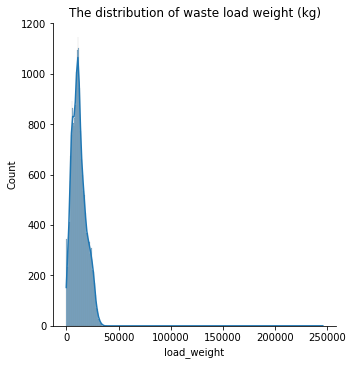

In [ ]:
plt.figure(figsize=(15,6))
sns.displot(df['load_weight'], kde=True, label='load_weight');
plt.title(label='The distribution of waste load weight (kg)');

As can be seen above, we can see that a lot of data are bunched together on the left side. based on that observation, we can say the data is `left-skewed`, which means the right way to handle the outliers is using IQR method

In [ ]:
# calculating IQR

q75, q25 = np.percentile(df['load_weight'], [75 ,25])
iqr = q75 - q25

In [ ]:
# initiating upper boundary and lower boundary to detect the outliers

upper_bound = q75 + (iqr * 1.5)
lower_bound = q25 - (iqr * 1.5)

In [ ]:
df.loc[(df['load_weight'] > upper_bound) | (df['load_weight'] < lower_bound)].shape[0]

126

According to the query above, we know that in the column `load_weight` we have **126** outliers

#### handling outliers

In this case, we will trim the outliers or in other words, we will just remove the outliers from our dataset

In [ ]:
df = df.loc[(df['load_weight'] <= upper_bound) & (df['load_weight'] >= lower_bound)]
df.shape

(24983, 5)

After we handle the outliers, we are left with **24983** rows ond **5** columns

### 4.3 Column Manipulation

#### Changing column's datatype
- `load_time` : object -> datetime

In [ ]:
df['report_date'] = pd.to_datetime(df['report_date'])
df['report_date'].dtype

dtype('<M8[ns]')

The data in column `report_date` has been changed from **object** Dtype to **<M8[ns]** Dtype

#### Dropping column(s)

We will drop column `load_time` since there is `report_date` that already tell us the date waste loading is reported.

In [ ]:
df.drop(columns='load_time', inplace=True)
df.shape

(24983, 4)

After we drop a column, we are left with **24983** rows ond **4** columns

In [ ]:
df.head()

,report_date,load_type,load_weight,dropoff_site
0,2021-07-08,TIRES,2260.0,MRF
1,2021-07-08,TIRES,1260.0,MRF
2,2021-07-08,TIRES,800.0,MRF
3,2021-05-01,TIRES,760.0,MRF
4,2021-07-03,TIRES,1400.0,MRF


## 5. Data Exploration 

There are 3 datatypes in the dataset:

1. DateTime : `report_date`
2. Categorical : `load_type`, `dropoff_site`
3. Numerical : `load_weight`

For each datatype, we will do different data exploration

### Datetime 

In [ ]:
df['report_date'].sort_values().min()

Timestamp('2021-01-02 00:00:00')

In [ ]:
df['report_date'].sort_values().max()

Timestamp('2021-07-09 00:00:00')

The data was first recorded on **2021-01-02** and last recorded on **2020-07-09**

### Categorical 

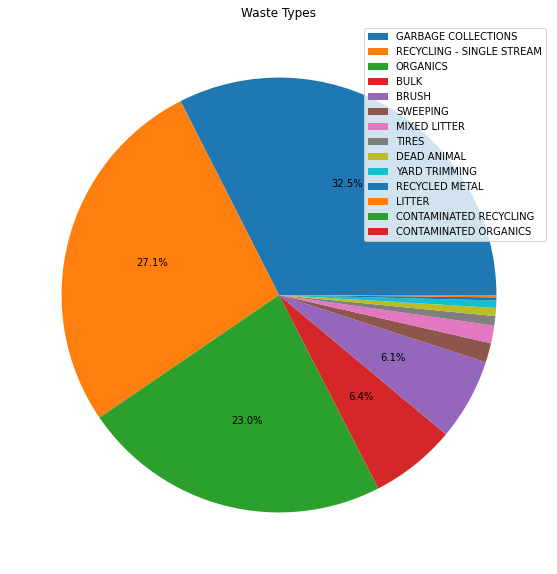

In [ ]:
def autopct(pct): # create a function to only show the label when it's > 5%
    return ('%1.1f%%' % pct) if pct > 5 else ''

_ = df['load_type'].value_counts().plot(kind='pie', fontsize=10, autopct=autopct, figsize=(20,10), labels=None, legend=True);
_.axes.get_yaxis().set_visible(False)
plt.title('Waste Types');

There are **14** types of waste in this dataset, with 'GARBAGE COLLECTIONS', 'RECYCLING - SINGLE STREAM' and 'ORGANICS' being the most frequent waste to be loaded.

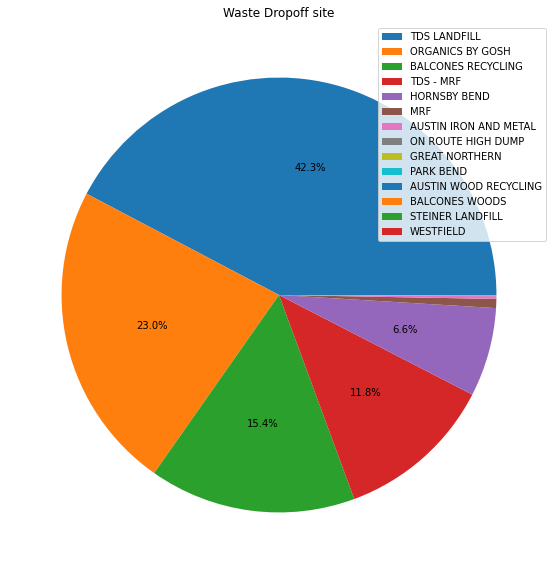

In [ ]:
_ = df['dropoff_site'].value_counts().plot(kind='pie', fontsize=10, autopct=autopct, figsize=(20,10), labels=None, legend=True);
_.axes.get_yaxis().set_visible(False)
plt.title('Waste Dropoff site');

There are **14** sites where the waste is dropped off to, with 'TDS LANDFILL', 'ORGANICS BY GOSH' and 'BALCONES RECYCLING' being the most frequent places to be used as a dropoff site.

### Numerical 

In [ ]:
mean_load_weight = df['load_weight'].mean()
median_load_weight = df['load_weight'].median()

print(f'''
Waste loading in Austin
mean = {mean_load_weight} kg
median = {median_load_weight} kg
''')


Waste loading in Austin
mean = 12100.151644694392 kg
median = 11260.0 kg



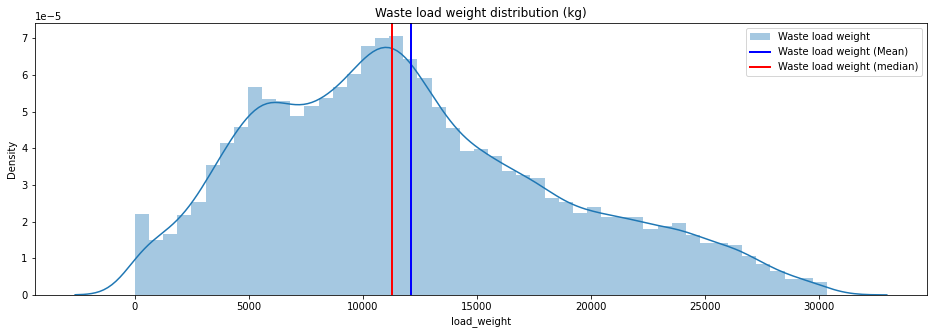

In [ ]:
plt.figure(figsize=(16,5));
sns.distplot(df['load_weight'], label='Waste load weight');
plt.axvline(mean_load_weight, color='blue', linewidth=2, label='Waste load weight (Mean)');
plt.axvline(median_load_weight, color='red', linewidth=2, label='Waste load weight (median)');
plt.title('Waste load weight distribution (kg)')
plt.legend();

From the figure above we can know that:

- The average of weight for every waste loading in Austin from 2021-01-02 to 2021-07-09 is **12100** kg.
- The median of weight for waste loading in Austin from 2021-01-02 to 2021-07-09 is **11260** kg.
- From this figure alone, we can see the distribution of this data is resembling a normal distribution where a lot data is gathered around the mean and median, but we need to do further analysis to determine whether this data is normally distributed.

In [ ]:
mode_load_weight = df['load_type'].mode()[0]
print(f'''
Waste loading in Austin
mode = {mode_load_weight}
''')


Waste loading in Austin
mode = GARBAGE COLLECTIONS



The most frequent weight of loaded waste in Austin is not a really useful information to know, apart from that, the most frequent type of loaded waste is more important to know. Thus, from the output above we know that the most frequent type of loaded waste in Austin is **Garbage Collection**.

## 6. Statistical Analysis

### Case 1 : The measure of central tendency of every dropoff sites

#### • Mean & median

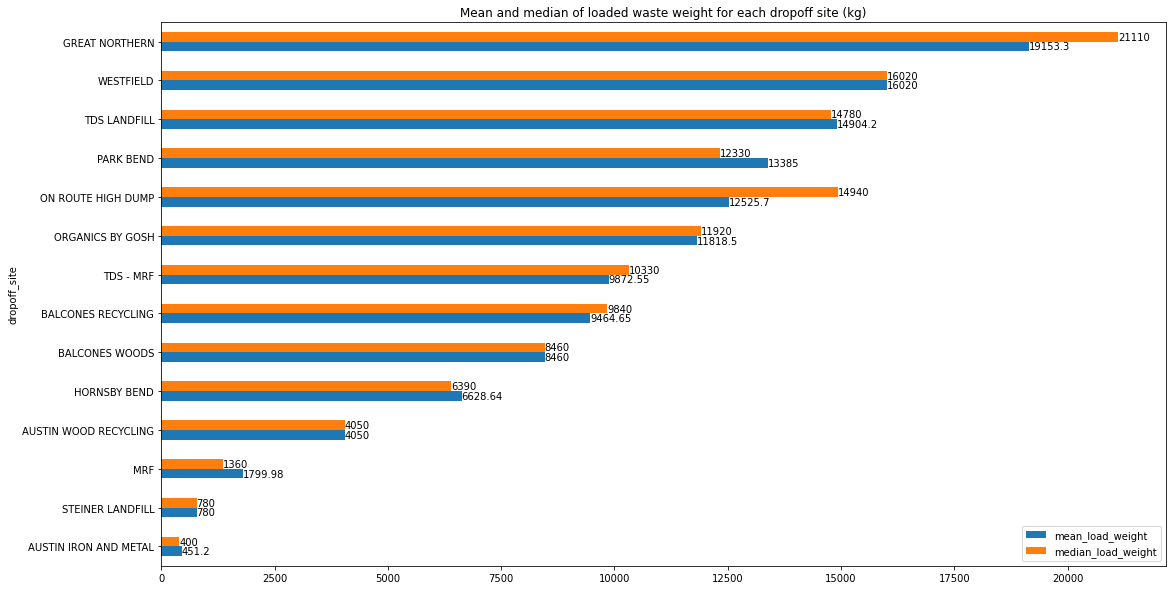

In [ ]:
_ = df.groupby('dropoff_site').agg(mean_load_weight=('load_weight',np.mean),
                                   median_load_weight=('load_weight',np.median)).sort_values(by='mean_load_weight', ascending=True).plot(kind='barh', figsize=(18,10) , title='Mean and median of loaded waste weight for each dropoff site (kg)')
_.bar_label(_.containers[0]);
_.bar_label(_.containers[1]);

From the figure above, we can know that:
- The sites with the heaviest average of waste per load are `Great Northern` (**19153** kg), `Westfield` (**16020** kg) and TDS `Landfill` (**14904.2** kg) respectively.
- The sites with the lightest average of waste per load are `MRF` (**1799.98** kg), `Steiner Landfill` (**780** kg) and TDS `Austin Iron and Metal` (**451.2** kg).
- There are 5 sites that load more heavyweight waste per load relative to their average waste per load, there are also 5 sites that load more lightweight waste per load relative to their average waste per load, and the rest of them are basically quite even.

#### • Mode

In [ ]:
df.groupby('dropoff_site')['load_type'].agg(st.mode).sort_values()

dropoff_site
HORNSBY BEND                                 ([BRUSH], [1512])
STEINER LANDFILL                  ([GARBAGE COLLECTIONS], [1])
WESTFIELD                         ([GARBAGE COLLECTIONS], [1])
GREAT NORTHERN                    ([GARBAGE COLLECTIONS], [6])
TDS LANDFILL                   ([GARBAGE COLLECTIONS], [8077])
PARK BEND                                    ([ORGANICS], [4])
ON ROUTE HIGH DUMP                           ([ORGANICS], [7])
ORGANICS BY GOSH                          ([ORGANICS], [5714])
AUSTIN IRON AND METAL                 ([RECYCLED METAL], [50])
BALCONES WOODS              ([RECYCLING - SINGLE STREAM], [1])
AUSTIN WOOD RECYCLING       ([RECYCLING - SINGLE STREAM], [2])
TDS - MRF                ([RECYCLING - SINGLE STREAM], [2917])
BALCONES RECYCLING       ([RECYCLING - SINGLE STREAM], [3837])
MRF                                           ([TIRES], [165])
Name: load_type, dtype: object

- **Brush** type of waste is the most common waste to be loaded in only `Hornsby Bend`.
- **Garbage Collection** type of waste is the most common waste to be loaded in `Steiner Landfill`, `Westfield`, `Great Northen` and `TDS Landfill`.
- **Organics** type of waste is the most common waste to be loaded in `Park Bend`, `On Route High Dump` and `Organics by Gosh`.
- **Recycled Metal** type of waste is the most common waste to be loaded in only `Austin Iron and Metal`.
- **Recycling - Single Stream** type of waste is the most common waste to be loaded in only `Balcones Woods`, `Austin Wood Recycling`, `TDS - MRF` and `Balcones Recycling`.
- **Tires** type of waste is the most common waste to be loaded in only `MRF`.

### Case 2 : 'TDS LANDFILL' dropoff site 

We want to further analyze the waste loading data in a specific site `TDS Landfill`, the reason being this site is the most frequent site to be used as a dropoff site with 42.3% usage amongst all of the sites.

In [ ]:
# creating a new dataframe to only have 'TDS LANDFILL' as the only value in dropoff_site column
df_landfill = df.loc[df['dropoff_site'] == 'TDS LANDFILL'].reset_index(drop=True)

In [ ]:
df_landfill.shape

(10565, 4)

In this new dataframe, we have **10565** rows and **4** columns

In [ ]:
df_landfill.head(3)

,report_date,load_type,load_weight,dropoff_site
0,2021-01-23,BULK,9940.0,TDS LANDFILL
1,2021-01-23,BULK,1960.0,TDS LANDFILL
2,2021-01-23,BULK,10760.0,TDS LANDFILL


In [ ]:
df_landfill.tail(3)

,report_date,load_type,load_weight,dropoff_site
10562,2021-03-01,RECYCLING - SINGLE STREAM,5320.0,TDS LANDFILL
10563,2021-03-01,BULK,3660.0,TDS LANDFILL
10564,2021-03-01,BULK,4440.0,TDS LANDFILL


#### • Data Overview

In [ ]:
mean_load_weight = df_landfill['load_weight'].mean()
median_load_weight = df_landfill['load_weight'].median()


print(f'''
Waste loading in TDS LANDFILL site
mean = {mean_load_weight} kg
median = {median_load_weight} kg
''')


Waste loading in TDS LANDFILL site
mean = 14904.217277747277 kg
median = 14780.0 kg



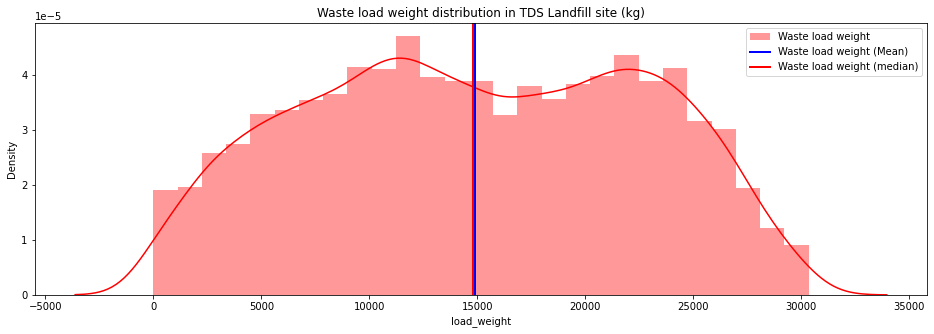

In [ ]:
plt.figure(figsize=(16,5));
sns.distplot(df_landfill['load_weight'], label='Waste load weight', color='red');
plt.axvline(mean_load_weight, color='blue', linewidth=2, label='Waste load weight (Mean)');
plt.axvline(median_load_weight, color='red', linewidth=2, label='Waste load weight (median)');
plt.title('Waste load weight distribution in TDS Landfill site (kg)')
plt.legend();

From the figure above we can say that:
- The average of weight for every waste loading in TDS Landfill is around **14904** kg.
- The median of weight for every waste loading in TDS Landfill is **14780** kg.
- Eventhough the mean and median have a similar value, somehow the data doesn't represent a normal distribution and on the contrary, it seems like an uniform distribution.



In [ ]:
mode_load_weight = df_landfill['load_type'].mode()[0]
print(f'''
Waste loading in TDS LANDFILL site
mode = {mode_load_weight}
''')


Waste loading in TDS LANDFILL site
mode = GARBAGE COLLECTIONS



With the same reason as previous one, instead of finding the mode for the weight, it is more informational to find the most frequent type of loaded waste in TDS Landfill which is **Garbage Collection**.

#### • Detecting outliers

we will assume that the data doesn't have a normal distribution based on the analysis we did earlier, so in order to detect the outliers we will use IQR method.

In [ ]:
q75_landfill, q25_landfill = np.percentile(df_landfill['load_weight'], [75 ,25])
iqr_landfill = q75_landfill - q25_landfill

In [ ]:
upper_bound_landfill = q75_landfill + (iqr_landfill * 1.5)
lower_bound_landfill = q25_landfill - (iqr_landfill * 1.5)

In [ ]:
outl = df_landfill.loc[(df_landfill['load_weight'] > upper_bound_landfill) | (df_landfill['load_weight'] < lower_bound_landfill)].shape[0]

print(f'number of outlier(s) in this dataframe is {outl}')

number of outlier(s) in this dataframe is 0


since there is no outlier in this dataframe, so we will not do any outliers handling

#### • Comparing the measure of central tendency of waste load weight in Austin and TDS Landfill

Since there is no outlier in the TDS Landfill data, so we will compare the measure of central tendency of waste load weight in Austin and TDS Landfill instead.

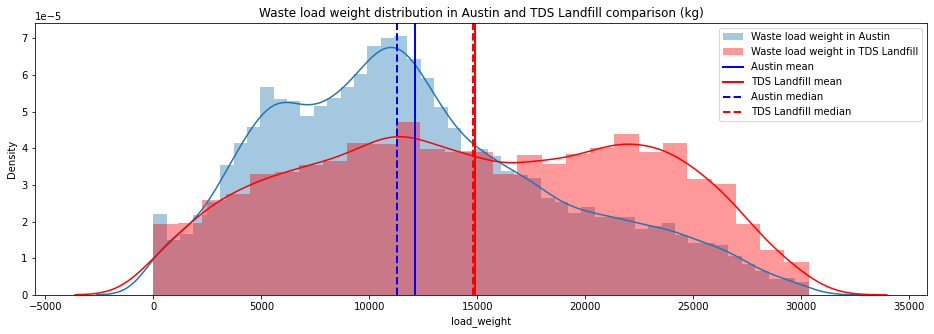

In [ ]:
plt.figure(figsize=(16,5));
sns.distplot(df['load_weight'], label='Waste load weight in Austin');
sns.distplot(df_landfill['load_weight'], label='Waste load weight in TDS Landfill',color='red');

plt.axvline(df['load_weight'].mean(), color='blue', linewidth=2, label='Austin mean');
plt.axvline(df_landfill['load_weight'].mean(), color='red',  linewidth=2, label='TDS Landfill mean');

plt.axvline(df['load_weight'].median(), color='blue', linewidth=2, label='Austin median', ls='--')
plt.axvline(df_landfill['load_weight'].median(), color='red',  linewidth=2, label='TDS Landfill median', ls='--')

plt.title('Waste load weight distribution in Austin and TDS Landfill comparison (kg)')

plt.legend();

From the figure above, we can say:
- The distribution of waste load weight in Austin is more normal-like, but on the other hand the distribution of TDS Landfill is more uniform-like.
- The average of weight of loaded waste in TDS Landfill is around **14904** kg which is a little bit higher than the Austin's with an average of around **12100** kg
- The median is also different, where the median of weight of loaded waste in TDS Landfill is **14780** kg which is higher the austin's with a median of **11260** kg

In [ ]:
df_mode = df['load_type'].mode()[0]
df_landfill_mode = df_landfill['load_type'].mode()[0]

print(f'''
The most common loaded waste
Austin : {df_mode}
TDS Landfill : {df_landfill_mode}
''')


The most common loaded waste
Austin : GARBAGE COLLECTIONS
TDS Landfill : GARBAGE COLLECTIONS



Both Austin and TDS Landfill have the same most common loaded waste which is **Garbage Collection**.

#### • Measure of Variability

In [ ]:
range_landfill = df_landfill['load_weight'].max() - df_landfill['load_weight'].min()
var_landfill = df_landfill['load_weight'].var()
std_landfill = df_landfill['load_weight'].std()

print(f'''
Measure of Variability of Load Weight in TDS Landfill
Range : {range_landfill}
Variance : {var_landfill}
Standard Deviation : {std_landfill}
''')


Measure of Variability of Load Weight in TDS Landfill
Range : 30340.0
Variance : 59111572.467617854
Standard Deviation : 7688.4050665673085



from the calculation above, we can say that:
- The difference between the heaviest waste load and the lightest waste load in TDS Landfill is **30340** kg
- There are a lot of waste load weight data that weight far heavier or lighter than the average of waste load weight in TDS Landfill or in other words the weights of waste load in TDS Landfill are very varied.

### Case 3 : Adding a new dropoff site

The government is planning to add a new dropoff site and in order to decide how big is the new dropoff site capacity should be, we will do a calculation on the `confidence interval` of the whole dataset since we need to take account of every dropoff site in Austin so we can know the right capacity of the new site relative to every dropoff site in Austin.

note : We will use confidence level of **95%** and an assumption that the data has a normal distribution.

In [ ]:
# using a function from scipy.stats to calculate the confidence interval with an assumption of the data having a normal distibution

lcb, upb = st.norm.interval(alpha=0.95, loc=np.mean(df['load_weight']))

print(f'The 95% confidence interval : {lcb, upb}')

The 95% confidence interval : (12098.191680709851, 12102.111608678932)


The suggestion that i will give to the government is based on the calculation of confidence internal of loaded waste weight from the entire dropoff sites. Our suggestion is the goverment should add a new dropoff site with the capacity around **12098** kg to **12102** kg.

### Case 4 : Hypothesis Test Analysis

We will do a hypothesis test analysis to know whether the average of waste weight per load of `TDS Landfill` and `Great Northern` are significantly different or not using `two samples independent two tailed test`. 

The basis of comparing those two sites is those two sites are very influential for waste disposal and management in Austin, `TDS Landfill` is the most used site for waste loading but on the other hand, `Great Northen` has the biggest weight average for each waste load.

note : confidence level : **95%** / Critical Value : 1 - 0.95 = **0.05**

Our hypothesis on this case:

**H0: μ_tds_landfill = μ_great_northern**

**H1: μ_tds_landfill != μ_great_northern**

In [ ]:
tds_landfill = df.loc[df['dropoff_site'] == 'TDS LANDFILL',  'load_weight']
great_northern = df.loc[df['dropoff_site'] == 'GREAT NORTHERN', 'load_weight']
                        
print('Average waste weight per load of TDS Landfill : {} kg'.format(np.round(tds_landfill.mean())))
print('Average waste weight per load of Great Northern: {} kg'.format(np.round(great_northern.mean())))

Average waste weight per load of TDS Landfill : 14904.0 kg
Average waste weight per load of Great Northern: 19153.0 kg


In [ ]:
t_stat, p_val = st.ttest_ind(tds_landfill, great_northern)

print('P-value:',p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.17592195052452972
t-statistics: -1.3535092239741997


Based on the result above, we can see that P-value = **0.17592** is bigger than our critical value = **0.05**, so we can conclude that **we fail to reject the null hypothesis**, hence TDS Landfill and Great Northern are not significantly different in terms of average waste weight per load.

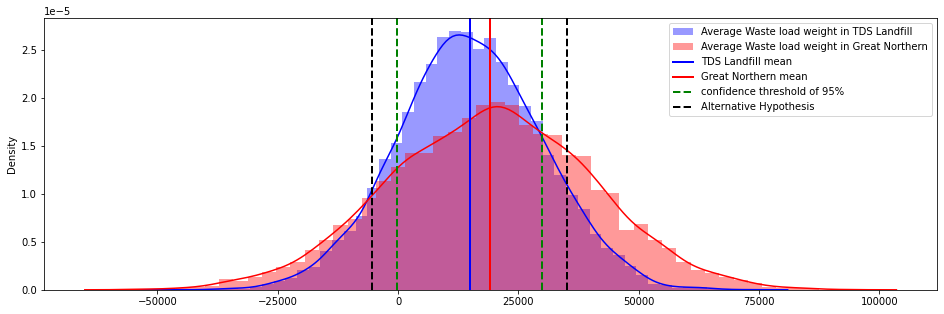

In [ ]:
tds_landfill_pop = np.random.normal(tds_landfill.mean(), tds_landfill.median(),10000)
great_northern_pop = np.random.normal(great_northern.mean(), great_northern.median(),10000)

ci = st.norm.interval(0.95, tds_landfill.mean(), tds_landfill.std())
plt.figure(figsize=(16,5))
sns.distplot(tds_landfill_pop, label='Average Waste load weight in TDS Landfill', color='blue')
sns.distplot(great_northern_pop, label='Average Waste load weight in Great Northern', color='red')

plt.axvline(tds_landfill.mean(), color='blue', linewidth=2, label='TDS Landfill mean')
plt.axvline(great_northern.mean(), color='red',  linewidth=2, label='Great Northern mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(tds_landfill_pop.mean()+t_stat*tds_landfill_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(tds_landfill_pop.mean()-t_stat*tds_landfill_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend();

Insight for the government:

The comparison between the average waste weight per load of TDS Landfill and Great Northern is not really different according to the test that we have performed

## 7. Math/Calculus Analysis

The city government wants to know how much is waste load in kg in Austin on the next day (July 10, 2021). For that problem, we will use the velocity formula to predict the value.

In [ ]:
df.head(3)

,report_date,load_type,load_weight,dropoff_site
0,2021-07-08,TIRES,2260.0,MRF
1,2021-07-08,TIRES,1260.0,MRF
2,2021-07-08,TIRES,800.0,MRF


In [ ]:
# grouping the data according to the report date, and sum the weight for every load on each day
weight = df.groupby('report_date')['load_weight'].sum()
weight.head(3)

report_date
2021-01-02    2138510.0
2021-01-04    2920260.0
2021-01-05    2325560.0
Name: load_weight, dtype: float64

In [ ]:
x = range(len(weight))
y = weight

In [ ]:
# finding gradient/first derivate for each day in the data

gradients = np.gradient(y,x)
v = gradients[-1]
v

-1266910.0

The velocity of loaded waste weight change on the last day is **-1266910** kg/day, the negative for velocity indicates that there should be a reduction of weight.

In [ ]:
# initiating a variable to store the data of the last day

w_today = weight[-1]
w_today

120340.0

On the last day, the wieght of loaded waste is **120340** kg

In [ ]:
# Using velocity formula to predict the value for the next day

w_tomorrow = w_today + v * 1

np.abs(w_tomorrow) # absoluting the value since it has negative value

1146570.0

Based on the calculation above, we predict that the loaded waste weight for tomorrow in Austin is **1146570** kg

## 8. Question Answer

## Statistics

#### 1. What technique that you use to handle outlier? Explain why?

The technique that we used to handle outlier in this assigment was Extreme Value Analysis, specifically IQR method. The decision was made because the data that we were handling, based on the observations and calculations, are not normally distributed. 

#### 2. What is the concept behind confidence interval so that we can use it to solve problem number 7 (stats)?

By definition, confidence interval is a range of values that's likely to include a population value with a certain degree of confidence. So, in order to solve the problem number 7 that asks us to give an analysis and suggestion on how big is the capacity of the new dropoff site should be, we need to know the range of average load waste weight in Austin. We don't want to make a dropoff site with an excessive capacity, and worse an insufficient one.

#### 3. Explain what hypothesis test that you used and why?

The hypothesis that we used for this assignment is `two samples independent two tailed test` which is a hypothesis test to hypothesize whether two population mean difference is statistically significant.

The reason why we use this specific hypothesis test is because we want to figure out whether the the mean of waste weight per load in TDS Landfill and Great Northern are significantly different since TDS Landfill is the most used dropoff site and Great Northern is the dropoff with the highest average of waste weight per load.

## Math/Calculus

#### 1. Calculating the first derivative can be done with symbolic and numeric method, on this case, which technique do you use?

In this assigment, we used numeric method to calculate the first derivative. The reason being, we need the value of gradient/first derivative from in order to predict the weight not just the symbol.

#### 2. Do you need mathematical function to calculate the derivative? (if yes/no) explain why!

In this case, we do not need mathematical function to calculate the derivate since for every point (day) in our dataset we will have different value for the gradient. But actually, we could try to find the mathematical function to represent the data, but that is not a good practice to be done since there is a more simple method to calculate derivative.

#### 3. What is your estimation of load weight for tomorrow (July 10, 2021)?

The estimation of load weight that we got for tomorrow (July 10, 2021) is **1146570** kg

## 9. Conclusion

Let's start with what kind of data that we are dealing with. So, this data is about waste disposal and management in Austin which are collected from 2021-01-02 to 2020-07-09. based on our data analysis, we got some insight that we can share.

First thing first, let's talk about what kind of waste that are dominant in Austin, we found out that `Garbage collection`, `recycling - single stream` and `organics` are the most 
frequent waste to be loaded. The same question goes to the dropoff site as well, `TDS Landfill`, `Organic by Gosh` and `Balcones Recycling` are the most frequent places to be used as a dropoff site, however it doesn't necessary mean that those 3 dropoff sites are always loading the heaviest waste load, on average `Great Northern`, `Westfield`  and `TDS Landfill` are the dropoff sites with the heaviest waste per load. How about the average for every waste load in Austin? According to our calculation, **12100** kg is the average with `Garbage Collection` as the most common load type.

Talking about a specific dropoff site, TDS Landfill is one of the most influential dropoff site in Austin due to the fact that more than 40% of waste load happened in TDS Landfill. averagely, Every single load that occured in TDS Landfull is weight around **14904** kg with Garbage Collection as the most common load type, and there is this idea about adding a new dropoff site, The idea seems feasable as long as the capacity is between **12098** kg to **12102** kg.

Another interesting case that might pique your interest is the comparison between the average of waste weight per load of two of the most influential dropoff site which are `TDS Landfill` and `Great Northern`, those two sites does not have a really different average according to the test that we have performed. And finally, the request of predicting tomorrow's loaded waste weight by the government, Based on the calculation that we have done, we predict that the loaded waste weight for tomorrow (July 10, 2021) in Austin is **1146570** kg